In [1]:
import sys
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from utils.symbol_different_matching_techniques import (
    ElectricalSymbolDetector,
    run_detection_pipeline,
    Detection
)

from utils.icon_filtering import (
    filter_detections,
    draw_filtered_detections,
    analyze_detection_distribution,
    visualize_detection_stats    
)

from dotenv import load_dotenv
load_dotenv()

# Configure matplotlib for inline display
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 10)

print("✓ Imports successful")


from google import genai
from google.genai import types

client = genai.Client()
from utils.pdf_to_image import pdf_to_images

✓ Imports successful


In [7]:
"""
methods


template_matching
edge_matching
shape_matching
frequency_matching
cnn_features

"""



template_image_path = "test_drawings/output_images/drawing_images/page_15.png"  
search_image_path = "test_drawings/output_images/drawing_images/page_9.png"
output_path = "test_drawings/output_images/output"

threshold = 0.8        
nms_threshold = 0.3   

max_display_size = 1600  
                        
# scales = [0.95, 0.96, 0.99, 1, 1.11]

# Or specify custom scales:
scales = [0.8, 0.83, 0.85, 0.88, 0.9, 0.93, 0.96, 1, 1.03, 1.07, 1.1, 1.2, 1.3]

rotations = list(np.linspace(0, 315, num=8, dtype=int))

# Output settings
save_output = True
output_path = None  # None = auto-generate name

print(f"Configuration loaded:")
print(f"  Template Image: {template_image_path}")
print(f"  Search Image: {search_image_path}")
print(f"  Threshold: {threshold}")
print(f"  NMS Threshold: {nms_threshold}")
print(f"  Max Display Size: {max_display_size}px")

Configuration loaded:
  Template Image: test_drawings/output_images/drawing_images/page_15.png
  Search Image: test_drawings/output_images/drawing_images/page_9.png
  Threshold: 0.8
  NMS Threshold: 0.3
  Max Display Size: 1600px


In [10]:
# Run the complete detection pipeline
results = run_detection_pipeline( 
    template_image_path=template_image_path,
    search_image_path=search_image_path,
    scales=scales,
    method ='cnn_features',
    rotations=rotations,
    threshold=threshold,
    nms_threshold=nms_threshold,
    save_output=save_output,
    output_path=output_path,
    max_display_size=max_display_size
    
)

# Store results for later use
detections = results['detections']
summary = results['summary']
result_image = results['result_image']
template = results['template']

Initializing CNN (VGG16) for feature extraction...
Note: VGG16 model files must be downloaded separately
Download from: https://github.com/opencv/opencv/wiki/TensorFlow-Object-Detection-API
✓ CNN placeholder initialized (download model files to use)
DETECTION METHOD: CNN_FEATURES

STEP 1: SELECT REFERENCE AREA (Rough Selection)
Instructions:
  - Draw a bounding box around the general area of the symbol
  - Press SPACE or ENTER to confirm

Select a ROI and then press SPACE or ENTER button!
Cancel the selection process by pressing c button!

STEP 2: REFINE SELECTION (Tight Crop)
Instructions:
  - Draw a TIGHT bounding box around ONLY the symbol
  - Press SPACE or ENTER to confirm

Select a ROI and then press SPACE or ENTER button!
Cancel the selection process by pressing c button!
✓ Template ready for CNN feature extraction

✓ TEMPLATE SELECTION COMPLETE!
  Method: CNN_FEATURES
  Template size: 120x121 pixels


STEP 3: DETECTING SYMBOLS

SEARCHING USING CNN_FEATURES
  Search image: test_

KeyboardInterrupt: 

In [ ]:
print("Original Detection Results:")
visualize_detection_stats(detections, title="Original Detection Statistics")


Original Detection Results:


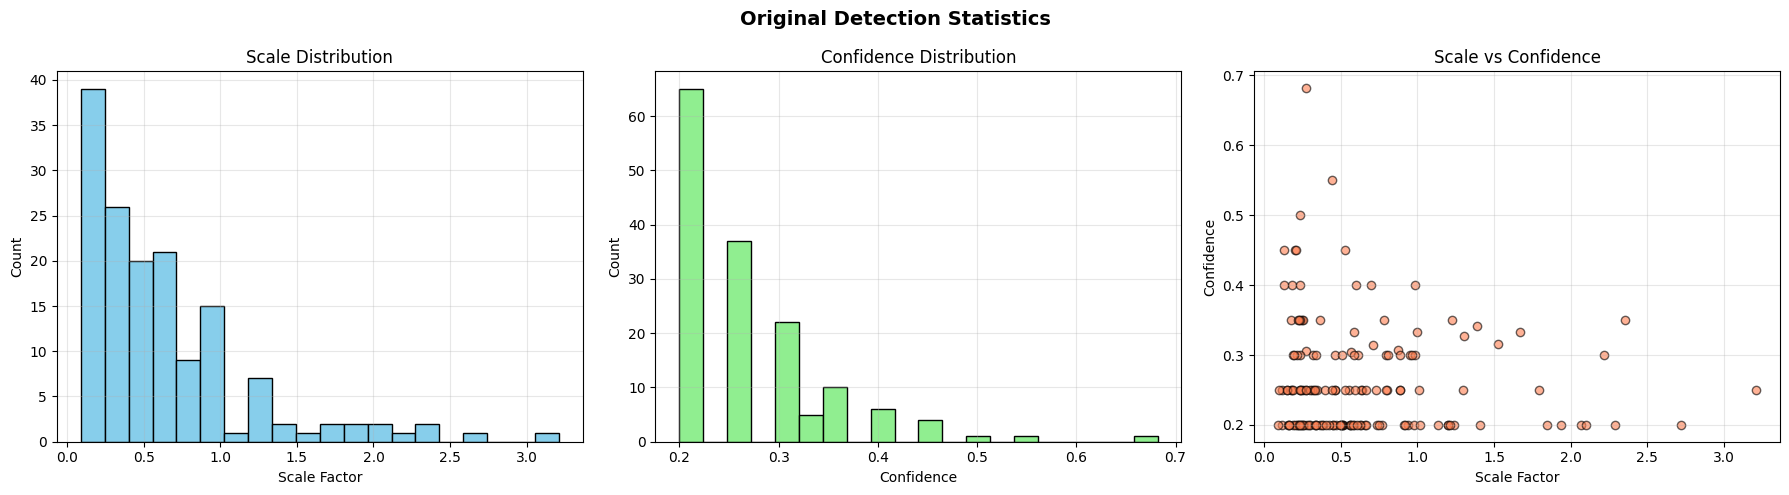


Original Detection Statistics
Total detections: 152
Confidence range: 0.200 - 0.682
Average confidence: 0.263
Scale range: 0.09 - 3.21

Detections per scale:
  Scale 0.09x: 1 detections
  Scale 0.10x: 1 detections
  Scale 0.12x: 1 detections
  Scale 0.12x: 1 detections
  Scale 0.13x: 2 detections
  Scale 0.15x: 1 detections
  Scale 0.15x: 1 detections
  Scale 0.16x: 1 detections
  Scale 0.16x: 1 detections
  Scale 0.17x: 1 detections
  Scale 0.18x: 1 detections
  Scale 0.18x: 1 detections
  Scale 0.18x: 1 detections
  Scale 0.18x: 1 detections
  Scale 0.19x: 1 detections
  Scale 0.19x: 1 detections
  Scale 0.19x: 1 detections
  Scale 0.19x: 1 detections
  Scale 0.20x: 1 detections
  Scale 0.20x: 1 detections
  Scale 0.20x: 1 detections
  Scale 0.21x: 1 detections
  Scale 0.22x: 1 detections
  Scale 0.22x: 1 detections
  Scale 0.22x: 1 detections
  Scale 0.23x: 1 detections
  Scale 0.23x: 1 detections
  Scale 0.23x: 1 detections
  Scale 0.23x: 2 detections
  Scale 0.23x: 1 detections
 

In [7]:
print("Original Detection Results:")
visualize_detection_stats(detections, title="Original Detection Statistics")
